# Today we investigate the dataset containing information on population religion  areasize more of 226 countries  so i am focusing on factor that effect GDP per capita and try to make a model useing 227 countries from the dataset **bold text**

In [1]:
#importing libraries 
import pandas as pd  #for data preprocesseing 
import numpy as np #for mathematical calculation 
import seaborn as sns # for vizualzation 
import matplotlib.pyplot as plt   #used for vizualization 
from sklearn.model_selection import train_test_split  #train test split 
from sklearn.preprocessing import LabelEncoder   # for label encodeing 
from sklearn.metrics import mean_squared_error , mean_squared_log_error  #cheaking the loss fuction

In [2]:
#Load the Data 
data=pd.read_csv("/content/Countries-GDP-Data.csv",decimal=',')

#vizulize the data 
data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [3]:
#Cheaking the missing value 
data.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [4]:
# cheaking data type of all columns 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [5]:
data.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


## Data preprocessing

I notice tha there is some missing value in this data so i just fill the misssing data useing the median of region that all countries belong to a countries that are closly geologically are often similar in many ways 

In [6]:
data.groupby('Region')[['GDP ($ per capita)','Literacy (%)','Agriculture']].median()

,GDP ($ per capita),Literacy (%),Agriculture
Region,,,
ASIA (EX. NEAR EAST),3450.0,90.60,0.1610
BALTICS,11400.0,99.80,0.0400
C.W. OF IND. STATES,3450.0,99.05,0.1980
EASTERN EUROPE,9100.0,98.60,0.0815
LATIN AMER. & CARIB,6300.0,94.05,0.0700
NEAR EAST,9250.0,83.00,0.0350
NORTHERN AFRICA,6000.0,70.00,0.1320
NORTHERN AMERICA,29800.0,97.50,0.0100
OCEANIA,5000.0,95.00,0.1505


In [7]:
# Fill up missing values
for col in data.columns.values:
    if data[col].isnull().sum() == 0:
        continue
    if col == 'Climate':
        guess_values = data.groupby('Region')['Climate'].apply(lambda x: x.mode().max())
    else:
        guess_values = data.groupby('Region')[col].median()
    for region in data['Region'].unique():
        data[col].loc[(data[col].isnull())&(data['Region']==region)] = guess_values[region]

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


## Data Exploration

# Now we Find  10 Countries With  Highest GDP

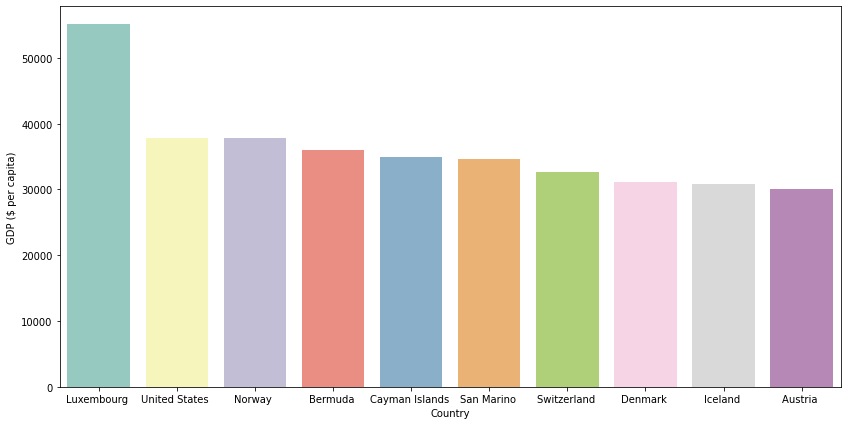

In [8]:
countries_with_highest_GDP=data.sort_values('GDP ($ per capita)',ascending=False)
countries_with_high_GDP=countries_with_highest_GDP[['GDP ($ per capita)','Country']].head(10)
plt.figure(figsize=(14,7))
sns.barplot(data=countries_with_high_GDP,x="Country",y="GDP ($ per capita)",palette='Set3')

# Now We Chek top factor that affecting GDP

Now we pick the six column which  are highly corelated  to  GDP and make scatter plot  so  first we cheak coorelation between all numerical columns with heatmap 

[]

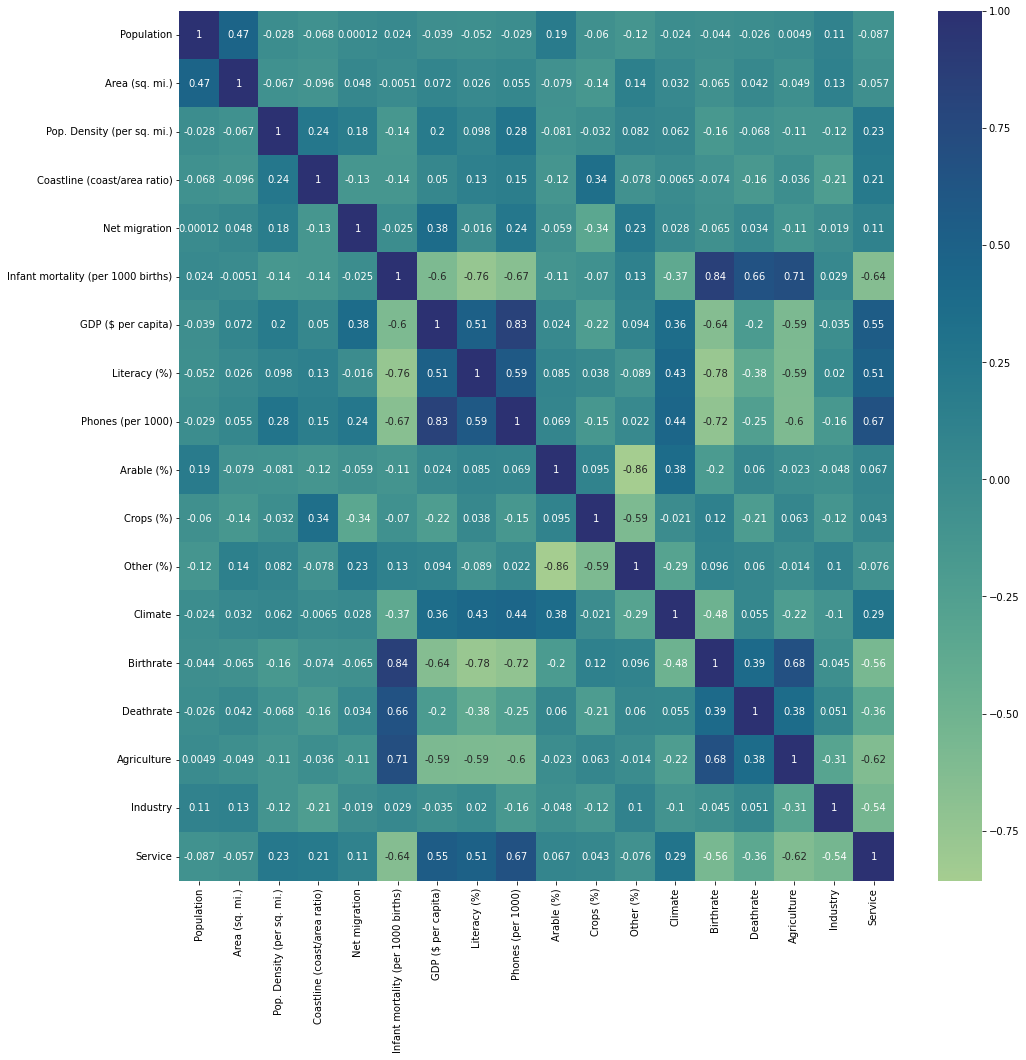

In [9]:
plt.figure(figsize=(16,16))
sns.heatmap(data.drop(columns=['Country','Region']).corr(),annot=True,cmap='crest')
plt.plot()

In [11]:
numeric_columns=data.drop(columns=['Country','Region'])
numeric_columns

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.3800,0.240,0.380
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.2320,0.188,0.579
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.1010,0.600,0.298
3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.1505,0.171,0.644
4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.0220,0.245,0.720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,2460492,5860,419.9,0.00,2.98,19.62,800.0,83.0,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.0900,0.280,0.630
223,273008,266000,1.0,0.42,-0.39,31.00,6000.0,70.0,123.6,0.02,0.00,99.98,1.0,21.98,5.13,0.1320,0.357,0.400
224,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.1350,0.472,0.393
225,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.2200,0.290,0.489


<ipython-input-12-6c0fb2867ba9>:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  corr_to_gdp = pd.Series()


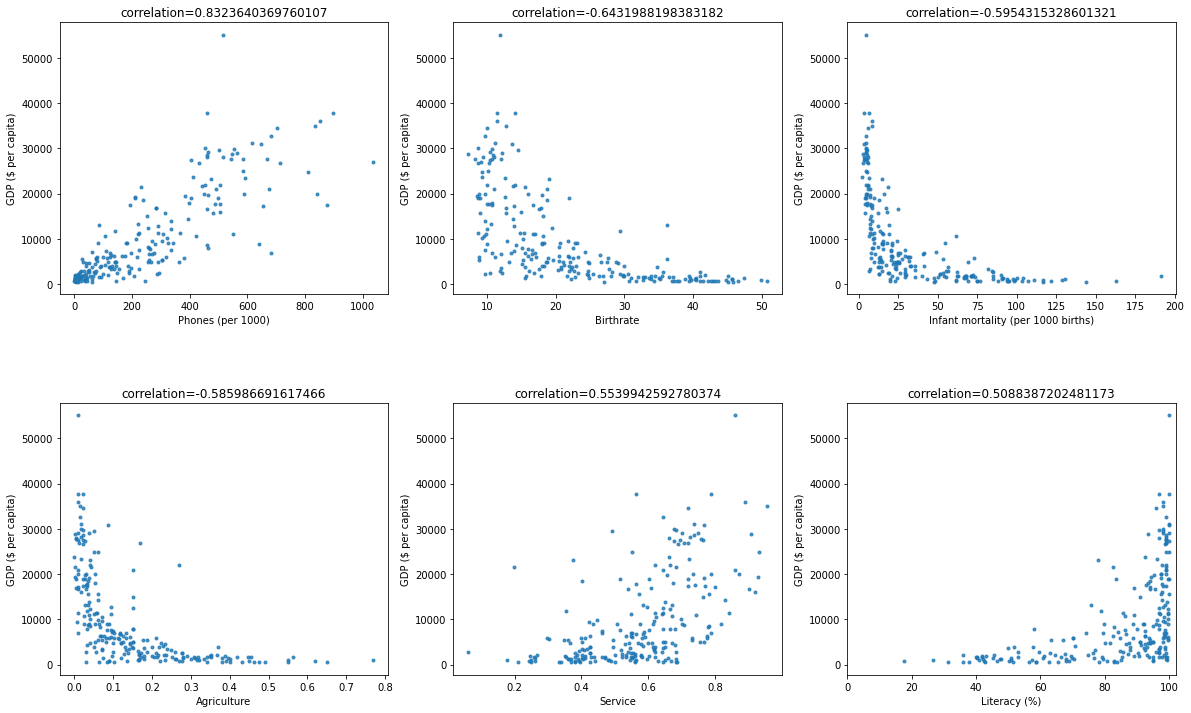

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,12))
plt.subplots_adjust(hspace=0.4)

corr_to_gdp = pd.Series()
for col in data.columns.values[2:]:
    if ((col!='GDP ($ per capita)')&(col!='Climate')):
        corr_to_gdp[col] = data['GDP ($ per capita)'].corr(data[col])
abs_corr_to_gdp = corr_to_gdp.abs().sort_values(ascending=False)
corr_to_gdp = corr_to_gdp.loc[abs_corr_to_gdp.index]

for i in range(2):
    for j in range(3):
        sns.regplot(x=corr_to_gdp.index.values[i*3+j], y='GDP ($ per capita)', data=data,
                   ax=axes[i,j], fit_reg=False, marker='.')
        title = 'correlation='+str(corr_to_gdp[i*3+j])
        axes[i,j].set_title(title)
axes[1,2].set_xlim(0,102)
plt.show()

# Modeling
training  and testing firstly i label encodeing all the feature  and i will use all the feature engenering  of data 

In [13]:
le=LabelEncoder()
data['Region_label']=le.fit_transform(data['Region'])
data['climate_label']=le.fit_transform(data['Climate'])
data.head(2)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Region_label,climate_label
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,...,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,0,0
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,...,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,3,4


In [14]:
x=data.drop(columns=['Country','Region','GDP ($ per capita)'])
y=data['GDP ($ per capita)']

#splitb the data for train and test 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
#cheaking shape 
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((181, 19), (46, 19), (181,), (46,))

In [15]:
# example of grid searching key hyperparameters for RandomForestClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
# define models and parameters
model = RandomForestRegressor()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best: 0.007357 using {'max_features': 'sqrt', 'n_estimators': 10}
0.007357 (0.012202) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.000000 (0.000000) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.000000 (0.000000) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.001852 (0.006929) with: {'max_features': 'log2', 'n_estimators': 10}
0.000000 (0.000000) with: {'max_features': 'log2', 'n_estimators': 100}
0.000000 (0.000000) with: {'max_features': 'log2', 'n_estimators': 1000}


In [16]:
model = RandomForestRegressor(max_features='sqrt',n_estimators=10)

In [17]:
random_forest=model.fit(x_train,y_train)
model_pred=random_forest.predict(x_test)
modell_predd=random_forest


In [21]:
rmse_test = np.sqrt(mean_squared_error(model_pred, y_test))
msle_test = mean_squared_log_error(model_pred, y_test)

In [23]:
print('rmse_train:',rmse_test,'msle_train:',msle_test)

rmse_train: 3637.5544221238865 msle_train: 0.3170784832546207


# Totoal GDP

In [34]:
data['Total GDP_capita']=data['GDP ($ per capita)']*data['Population']
top_gdp_countries=data.sort_values('Total GDP_capita',ascending=False).head(10)


In [35]:
other = pd.DataFrame({'Country':['Other'], 'Total GDP_capita':[data['Total GDP_c0.3apita'].sum() - top_gdp_countries['Total GDP_capita'].sum()]})
gdps = pd.concat([top_gdp_countries[['Country','Total GDP_capita']],other],ignore_index=True)


In [38]:
gdps

,Country,Total GDP_capita
0,United States,1.128119e+13
1,China,6.569869e+12
2,Japan,3.594474e+12
3,India,3.176521e+12
4,Germany,2.274855e+12
5,France,1.680181e+12
6,United Kingdom,1.678874e+12
7,Italy,1.552165e+12
8,Brazil,1.429395e+12
9,Russia,1.271753e+12


In [39]:
other

,Country,Total GDP_capita
0,Other,1.820236e+13


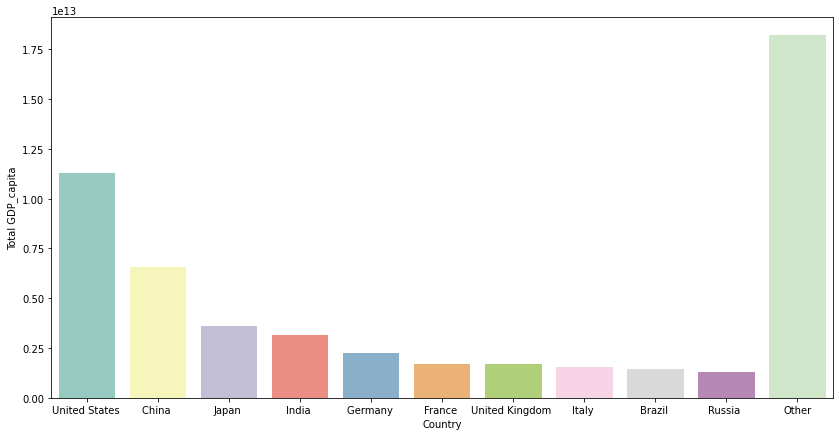

In [41]:
plt.figure(figsize=(14,7))
sns.barplot(x='Country',y='Total GDP_capita',data=gdps,palette='Set3')
plt.show()

([<matplotlib.patches.Wedge at 0x7fddb664a820>,
 [Text(0.8605931345192056, 0.6851127329267853, 'United States '),
  Text(-0.1811920775149626, 1.0849743918848094, 'China '),
  Text(-0.766747098849727, 0.7887324555294571, 'Japan '),
  Text(-1.014879729422134, 0.4242866187002089, 'India '),
  Text(-1.097222139184483, 0.07812539461293833, 'Germany '),
  Text(-1.0851259417295376, -0.18028225255300118, 'France '),
  Text(-1.0276012915860582, -0.39247367495242974, 'United Kingdom '),
  Text(-0.9334951345181319, -0.5818821477163353, 'Italy '),
  Text(-0.8159383139534945, -0.7377294001344457, 'Brazil '),
  Text(-0.6871351150779667, -0.8589792393456258, 'Russia '),
  Text(0.5137463435890665, -0.972658570336408, 'Other')],
 [Text(0.46941443701047575, 0.373697854323701, '21.4%'),
  Text(-0.0988320422808887, 0.5918042137553505, '12.5%'),
  Text(-0.4182256902816692, 0.4302177030160675, '6.8%'),
  Text(-0.553570761502982, 0.23142906474556846, '6.0%'),
  Text(-0.5984848031915361, 0.04261385160705726, 

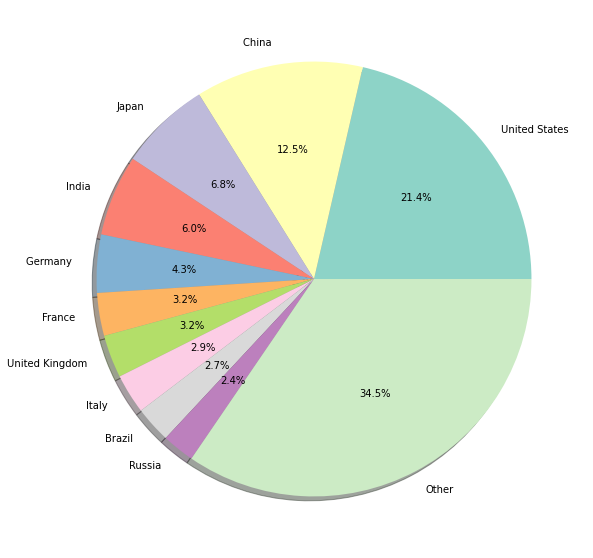

In [46]:
plt.figure(figsize=(10,10))
plt.pie(gdps['Total GDP_capita'],labels=gdps['Country'],colors=sns.color_palette("Set3", gdps.shape[0]).as_hex(),autopct='%1.1f%%',shadow=True)

now let us cheak the  factor effecting gdp
so we cheak the correlation between total gdp and other colums

In [49]:
corr_of_gdp=pd.Series()
for col in data.drop(columns=['Country','Region']):
  if ((col!='Total_GDP ($)')&(col!='Climate')&(col!='GDP ($ per capita)')):
        corr_to_gdp[col] = data['Total GDP_capita'].corr(data[col])
abs_corr_to_gdp=corr_to_gdp.abs().sort_values(ascending=False)
corr_to_gdp=corr_to_gdp.loc[abs_corr_to_gdp.index]
print(corr_to_gdp)

Total GDP_capita                      1.000000
Population                            0.639528
Area (sq. mi.)                        0.556396
Phones (per 1000)                     0.233484
Birthrate                            -0.166889
Agriculture                          -0.139516
Arable (%)                            0.129928
climate_label                         0.125791
Infant mortality (per 1000 births)   -0.122076
Literacy (%)                          0.099417
Service                               0.085096
Region_label                         -0.079745
Crops (%)                            -0.077078
Coastline (coast/area ratio)         -0.065211
Other (%)                            -0.064882
Net migration                         0.054632
Industry                              0.050399
Deathrate                            -0.035820
Pop. Density (per sq. mi.)           -0.028487
dtype: float64


<ipython-input-49-374b45768109>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  corr_of_gdp=pd.Series()


## Finally let us do comparision of economy structure of 10 countries  with highest GDP

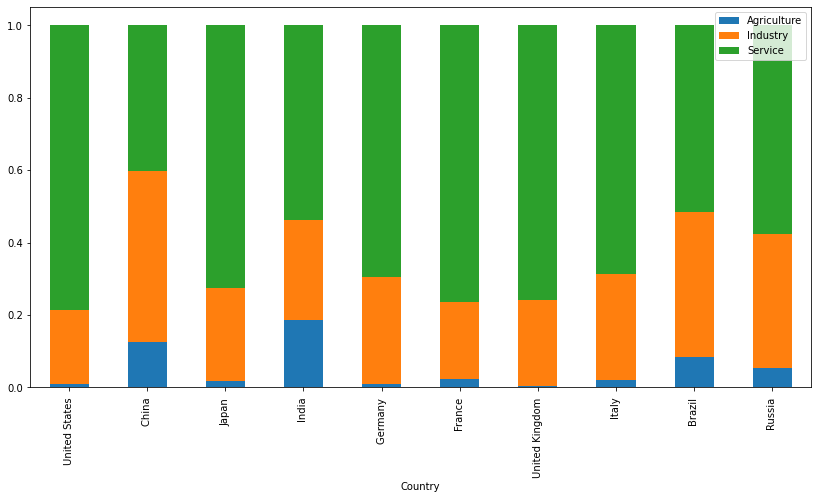

In [55]:
plot_data=top_gdp_countries[['Country','Agriculture', 'Industry', 'Service']].set_index('Country')
plot_data.plot.bar(stacked=True,figsize=(14,7))
plt.show()